Plots for Allison's lya results 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/'
os.listdir(path)

['oehua1010_noSR_smearingcorr_MCMC_results.csv',
 'allfour2_noSR_nosmearing_MCMC_results.csv',
 'allfour_noSR_nosmearing_MCMC_results.csv',
 'allfour_SR_ISMfixedonly_equalweighting_MCMC_results.csv',
 'allfour_SR_ISMfixedonly_MCMC_results.csv',
 'allfour_SR_RVvaryonly_MCMC_results.csv',
 'allfour_SR_sameprofile_MCMC_results.csv',
 'NV_allfour_MCMC_results.csv',
 'NV_allfour_v2_MCMC_results.csv',
 'oehua1010_noSR_nosmearing_MCMC_results.csv',
 'oehua1010_SR_nosmearing_MCMC_results.csv',
 'oehua2010_noSR_nosmearing_MCMC_results.csv',
 'oehua2010_noSR_smearingcorr_MCMC_results.csv',
 'oehua2010_SR_nosmearing_MCMC_results.csv',
 'oehua3010_noSR_nosmearing_MCMC_results.csv',
 'oehua3010_noSR_smearingcorr_MCMC_results.csv',
 'oehua3010_SR_nosmearing_MCMC_results.csv',
 'oehua4010_noSR_nosmearing_MCMC_results.csv',
 'oehua4010_noSR_smearingcorr_MCMC_results.csv',
 'oehua4010_SR_nosmearing_MCMC_results.csv',
 'SiIII_allfour_MCMC_results.csv',
 'SiIII_allfour_v2_MCMC_results.csv']

In [3]:
sr_specs = glob.glob('{}*0_SR_nosmearing*'.format(path))
# args = np.argsort(sr_specs)
# sr_specs = sr_specs[args]
sr_specs


['/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua1010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua2010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua3010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua4010_SR_nosmearing_MCMC_results.csv']

In [4]:
phase = np.array([0.73, 0.03, 0.3, 0.53])
phase_sort = phase[np.argsort(phase)]
sr_specs_phase = np.array(sr_specs)[np.argsort(phase)]

In [5]:
data = Table.read(sr_specs[1])

In [6]:
data.dtype.names

('col0',
 'lya_model_low_2sig',
 'lya_model_low_1sig',
 'lya_model_median',
 'lya_model_high_1sig',
 'lya_model_high_2sig',
 'lya_intrinsic_low_2sig',
 'lya_intrinsic_low_1sig',
 'lya_intrinsic_median',
 'lya_intrinsic_high_1sig',
 'lya_intrinsic_high_2sig',
 'lya_ism_low_2sig',
 'lya_ism_low_1sig',
 'lya_ism_median',
 'lya_ism_high_1sig',
 'lya_ism_high_2sig',
 'lya_reversal_low_2sig',
 'lya_reversal_low_1sig',
 'lya_reversal_median',
 'lya_reversal_high_1sig',
 'lya_reversal_high_2sig',
 'lya_intrinsic_fluxes',
 'vs_n value',
 'am_n value',
 'fw_L_n value',
 'fw_G_n value',
 'h1_col value',
 'h1_b value',
 'h1_vel value',
 'h1_col2 value',
 'h1_b2 value',
 'h1_vel2 value',
 'h1_col3 value',
 'h1_b3 value',
 'h1_vel3 value',
 'd2h value',
 'p value',
 'wave_lya',
 'flux_lya',
 'error_lya')

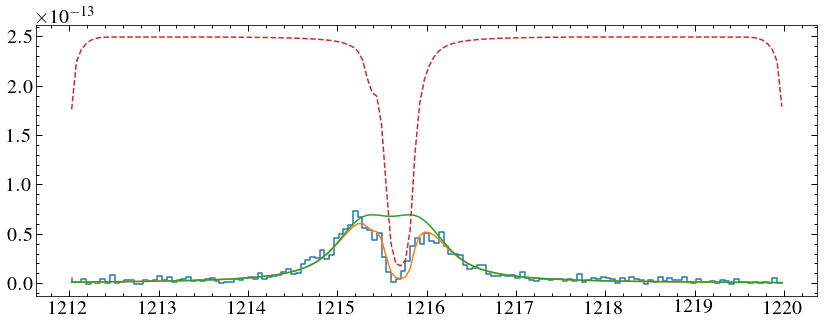

In [7]:
plt.step(data['wave_lya'], data['flux_lya'])
plt.plot(data['wave_lya'], data['lya_model_median'])
plt.plot(data['wave_lya'], data['lya_intrinsic_median'])
plt.plot(data['wave_lya'], data['lya_ism_median']*0.25e-12, ls='--')
# plt.plot(data['wave_lya'], data['lya_intrinsic_median']*data['lya_ism_median'])


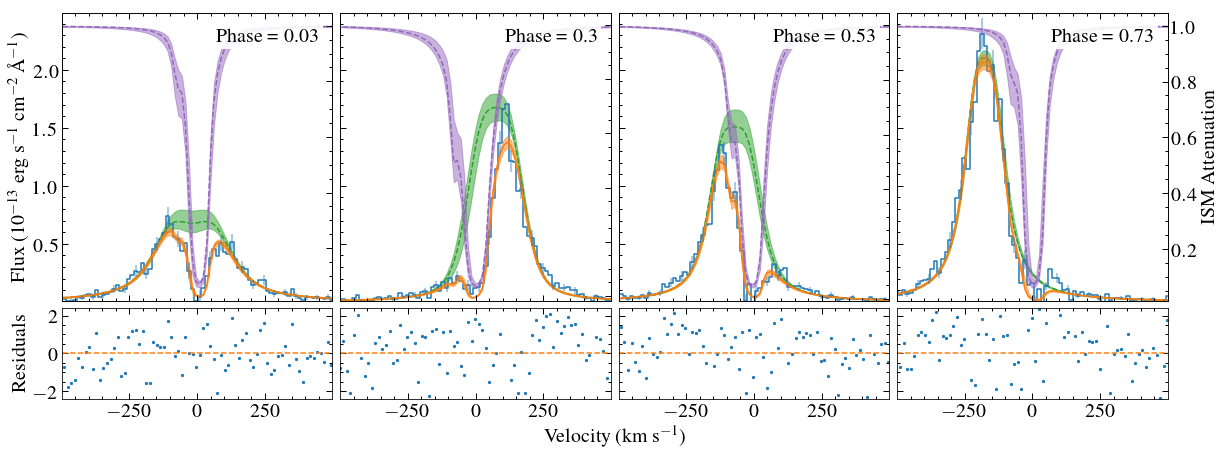

In [8]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    

And the same without SR

In [9]:
nosr_specs = glob.glob('{}*0_noSR_nosmearing*'.format(path))
nosr_specs

['/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua1010_noSR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua2010_noSR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua3010_noSR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua4010_noSR_nosmearing_MCMC_results.csv']

In [10]:
nosr_specs_phase = np.array(nosr_specs)[np.argsort(phase)]

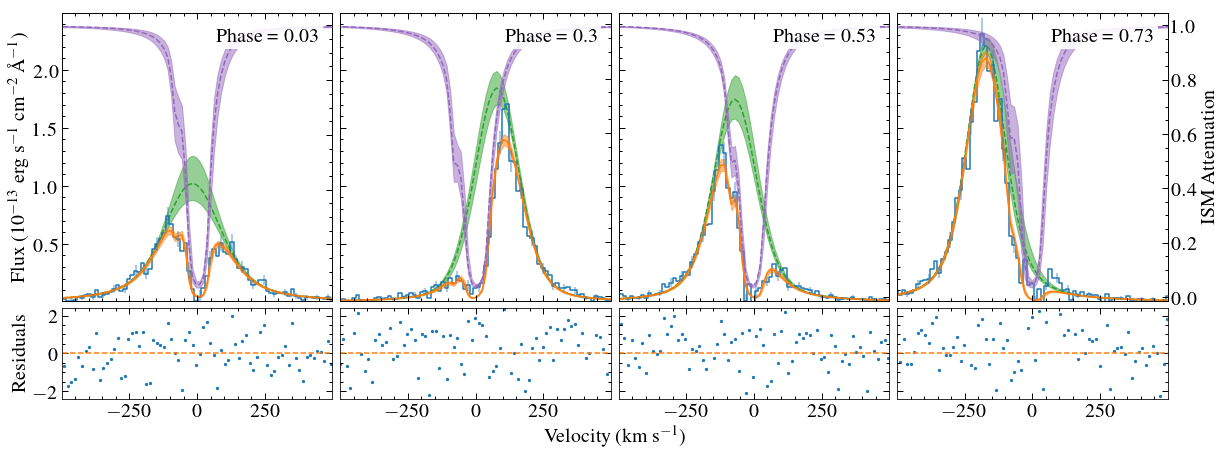

In [11]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_fit_nosr.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_fit_nosr.pdf')
    

-17.824879382574647 km / s
74.29481307656982 km / s
-72.0550969188134 km / s
-177.08386312751188 km / s
-17.46324142232819 km / s
78.73844491927993 km / s
-70.77576143430441 km / s
-171.1286394668425 km / s


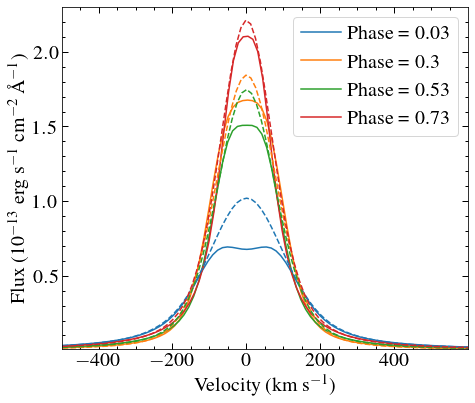

In [19]:
plt.figure(figsize=(7,6))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, label='Phase = {}'.format(phase_sort[i]))
    
plt.gca().set_prop_cycle(None)
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, ls='--')
plt.xlim(-499, 599)
plt.ylim(0.01, 2.3)
plt.legend(frameon=True)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.savefig('plots/intrinsic_ly_all.pdf')

because I can. Well that did not work, cyberpunk version needs a lot of work.

In [13]:
# import mplcyberpunk

# plt.style.use("cyberpunk")
    
# lya = 1215.67
# fig, axes = plt.subplots(figsize=(18,7))
# gs = GridSpec(4, 4, figure=fig)
# ism_scale = 2.3e-13 #scaling ism to plot
# fscale = 1e13 #scaling flux to axis
# ism_scale *= fscale
# # plt.figure(figsize=(20, 5))
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     ax = plt.subplot(gs[0:3, i])
#     v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
#     plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
#     plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
#     plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
#     plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
#     plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
#     plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
# #     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
# #     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
#     plt.xlim(-499, 499)
#     plt.ylim(0.01, 2.49)
#     if i > 0:
#         # plt.yticks(visible=False)
#         ax.set_yticklabels([])
#     if i == 0:
#         # plt.legend(loc=2, frameon=True)
#         plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
#     plt.xticks(visible=False)
    
#     ax2=ax.twinx()
#     ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
#     ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
#     if i < 3:
#         ax2.set_yticklabels([])
#     if i == 3:
#         ax2.set_ylabel('ISM Attenuation')
        
    
    
    
#     plt.subplot(gs[3:, i])
#     plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
#     plt.xlim(-499, 499)
#     plt.ylim(-2.4,2.4)
#     if i > 0:
#         plt.yticks(visible=False)
#     plt.axhline(0, ls='--', c='C1')
#     if i == 0:
#         plt.ylabel('Residuals')
    
     
        
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# # plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
# plt.xlabel('Velocity (km s$^{-1}$)', size=20)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.08, wspace=0.03)
# # plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
# # plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    

In [22]:
data.dtype.names

('col0',
 'lya_model_low_2sig',
 'lya_model_low_1sig',
 'lya_model_median',
 'lya_model_high_1sig',
 'lya_model_high_2sig',
 'lya_intrinsic_low_2sig',
 'lya_intrinsic_low_1sig',
 'lya_intrinsic_median',
 'lya_intrinsic_high_1sig',
 'lya_intrinsic_high_2sig',
 'lya_ism_low_2sig',
 'lya_ism_low_1sig',
 'lya_ism_median',
 'lya_ism_high_1sig',
 'lya_ism_high_2sig',
 'lya_reversal_low_2sig',
 'lya_reversal_low_1sig',
 'lya_reversal_median',
 'lya_reversal_high_1sig',
 'lya_reversal_high_2sig',
 'lya_intrinsic_fluxes',
 'vs_n value',
 'am_n value',
 'fw_L_n value',
 'fw_G_n value',
 'h1_col value',
 'h1_b value',
 'h1_vel value',
 'h1_col2 value',
 'h1_b2 value',
 'h1_vel2 value',
 'h1_col3 value',
 'h1_b3 value',
 'h1_vel3 value',
 'd2h value',
 'p value',
 'wave_lya',
 'flux_lya',
 'error_lya')

In [56]:
# data['fw_L_n value']

In [215]:
# lya = 1215.67
# fig, axes = plt.subplots(6, 1, figsize=(8,24), sharex=True)
# # gs = GridSpec(4, 4, figure=fig)
# ism_scale = 2.3e-13 #scaling ism to plot
# fscale = 1e13 #scaling flux to axis
# ism_scale *= fscale
# # plt.figure(figsize=(20, 5))
# xlims = [-0.09, 1.09]

# #lya flux
# plt.subplot(611)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     flya = data['lya_intrinsic_fluxes'][2]
#     flya_err = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])*fscale
#     flya *= fscale
#     if i == 0:
#         plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C0', marker = 'o', label = 'SR', ls='none')
#     else:
#         plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C0', marker = 'o', ls='none')
        
# for i, spec in enumerate(nosr_specs_phase):
#     data = Table.read(spec)
#     flya = data['lya_intrinsic_fluxes'][2]
#     flya_err = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])*fscale 
#     flya *= fscale
#     if i == 0:
#         plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C1', marker = 's', alpha =0.5 , zorder=-1, label='No SR', ls='none')
#     else:
#         plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C1', marker = 's', alpha =0.5 , zorder=-1, ls='none')
# plt.legend(frameon=True)
# # plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
# plt.ylabel(r'Ly\,$\alpha$ Intrinsic Flux')
# plt.xticks(visible=False)
# plt.xlim(xlims[0], xlims[1])

# #lyafwhm
# plt.subplot(612)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     fwhml = data['fw_L_n value'][2]
#     fwhml_err = np.array([[fwhml-data['fw_L_n value'][1]],[data['fw_L_n value'][3]-fwhml]])
#     if i == 0:
#         plt.errorbar(phase_sort[i], fwhml, yerr=fwhml_err, marker='o', c='C0', label = r'$FWHM_L$', ls='none')
#     else:
#         plt.errorbar(phase_sort[i], fwhml, yerr=fwhml_err, marker='o', c='C0', ls='none')
    
#     fwhmg = data['fw_G_n value'][2]
#     fwhmg_err = np.array([[fwhmg-data['fw_G_n value'][1]],[data['fw_G_n value'][3]-fwhmg]])
#     if i == 0:
#         plt.errorbar(phase_sort[i], fwhmg, yerr=fwhmg_err, marker='s', c='C1', label = r'$FWHM_G$', zorder=-1, alpha=0.5, ls='none')
#     else:
#         plt.errorbar(phase_sort[i], fwhmg, yerr=fwhmg_err, marker='s', c='C1', zorder=-1, alpha=0.5, ls='none')
        
# plt.legend(frameon=True)
# plt.ylabel(r'Ly\,$\alpha$ width  (km s$^{-1}$)')
# plt.xticks(visible=False)   
# plt.xlim(xlims[0], xlims[1])


# #N(H)
# plt.subplot(613)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     nh = data['h1_col value'][2]
#     nh_err = np.array([[nh-data['h1_col value'][1]],[data['h1_col value'][3]-nh]])
#     plt.errorbar(phase_sort[i], nh, yerr=nh_err, marker='o', c='C0', ls='none')
# plt.ylabel('log N(H{\sc i})')
# plt.xticks(visible=False) 
# plt.xlim(xlims[0], xlims[1])


# #v(ISM)
# plt.subplot(614)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     vism = data['h1_vel value'][2]
#     vism_err = np.array([[vism-data['h1_vel value'][1]],[data['h1_vel value'][3]-vism]])
#     plt.errorbar(phase_sort[i], vism, yerr=vism_err, marker='o', c='C0', ls='none')
# plt.ylabel(r'$V_{\mathrm{ISM}}$ (km s$^{-1}$)')
# plt.xticks(visible=False) 
# plt.xlim(xlims[0], xlims[1])


# #v(lines)
# plt.subplot(615)
# vlyas= [] 
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     vlya = data['vs_n value'][2]
#     vlya_err = np.array([[vlya-data['vs_n value'][1]],[data['vs_n value'][3]-vlya]])
#     if i == 0:
#         plt.errorbar(phase_sort[i], vlya, yerr=vlya_err, marker='o', c='C0', label= r'Ly$\alpha$', ls='none')
#     else:
#         plt.errorbar(phase_sort[i], vlya, yerr=vlya_err, marker='o', c='C0', ls='none')
#     vlyas.append(vlya)

# fitter = fitting.LevMarLSQFitter()

# #add a sine curve for reference

# orbit = models.Sine1D(124.9, 1, 0, fixed=dict(frequency=True))+models.Const1D(-29)
# orbfit = fitter(orbit, phase_sort, vlyas, maxiter=10000)
# plt.plot(np.linspace(xlims[0], xlims[1], 100), orbfit(np.linspace(xlims[0], xlims[1], 100)), alpha=0.5, ls='--')
# print(orbfit)


# data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
# #oehua4010_SR_nosmearing_MCMC_results.csv
# for i, spec in enumerate(sr_specs_phase):
#     speci = os.path.split(spec)[1][5]
#     name = 'vs{} value'.format(speci)
#     vNv = data[name][2]
#     vNv_err = np.array([[vNv-data[name][1]],[data[name][3]-vNv]])
#     if i == 0:
#         plt.errorbar(phase_sort[i], vNv, yerr=vNv_err, marker='s', c='C1', label= r'N\,{\sc v}', ls='none', zorder=-1, alpha=1)
#     else:
#         plt.errorbar(phase_sort[i], vNv, yerr=vNv_err, marker='s', c='C1', ls='none', zorder=-1, alpha=1)
        
        
# data = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))
# #oehua4010_SR_nosmearing_MCMC_results.csv
# for i, spec in enumerate(sr_specs_phase):
#     speci = os.path.split(spec)[1][5]
#     name = 'vs{} value'.format(speci)
#     vsi = data[name][2]
#     vsi_err = np.array([[vsi-data[name][1]],[data[name][3]-vsi]])
#     if i == 0:
#         plt.errorbar(phase_sort[i], vsi, yerr=vsi_err, marker='*', c='C2', label= r'Si\,{\sc iii}', ls='none', zorder=-2, alpha=1)
#     else:
#         plt.errorbar(phase_sort[i], vsi, yerr=vsi_err, marker='*', c='C2', ls='none', zorder=-2, alpha=1)



        
# plt.legend(frameon=True)
# plt.ylabel(r'$V_{\mathrm{Line}}$ (km s$^{-1}$)')
# plt.xticks(visible=False) 
# plt.xlim(xlims[0], xlims[1])

# #line_fluxes
# plt.subplot(616)
# data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
# #oehua4010_SR_nosmearing_MCMC_results.csv
# #oehua1010_model_tmp_fluxes
# for i, spec in enumerate(sr_specs_phase):
#     speci = os.path.split(spec)[1][:9]
#     # print(speci)
#     name = '{}_model_tmp_fluxes'.format(speci)
#     fNv = data[name][2]
#     fNv_err = np.array([[fNv-data[name][1]],[data[name][3]-fNv]])
#     fNv, fNv_err = fNv*fscale, fNv_err*fscale
#     if i == 0:
#         plt.errorbar(phase_sort[i], fNv, yerr=fNv_err, marker='s', c='C1', label= r'N\,{\sc v}', ls='none', zorder=-1, alpha=1)
#     else:
#         plt.errorbar(phase_sort[i], fNv, yerr=fNv_err, marker='s', c='C1', ls='none', zorder=-1, alpha=1)
        
        
# data = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))
# #oehua4010_SR_nosmearing_MCMC_results.csv
# for i, spec in enumerate(sr_specs_phase):
#     speci = os.path.split(spec)[1][:9]
#     name = '{}_model_tmp_fluxes'.format(speci)
#     fsi = data[name][2]
#     fsi_err = np.array([[fsi-data[name][1]],[data[name][3]-fsi]])
#     fsi, fsi_err = fsi*fscale, fsi_err*fscale
#     if i == 0:
#         plt.errorbar(phase_sort[i], fsi, yerr=fsi_err, marker='*', c='C2', label= r'Si\,{\sc iii}', ls='none', zorder=-2, alpha=1)
#     else:
#         plt.errorbar(phase_sort[i], fsi, yerr=fsi_err, marker='*', c='C2', ls='none', zorder=-2, alpha=1)

# plt.legend(frameon=True)
# plt.ylabel('Line Flux')
# # plt.xticks(visible=False) 

# plt.xlim(xlims[0], xlims[1])
# plt.xlabel('Phase')


# plt.tight_layout()


[ -13.59507436   81.44002606  -64.70700827 -165.24048793]
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Sine1D(amplitude=124.5, frequency=1., phase=0.00390106)>

    [1]: <Const1D(amplitude=-33.8)>
Parameters:
    amplitude_0 frequency_0        phase_0        amplitude_1
    ----------- ----------- --------------------- -----------
          124.5         1.0 0.0039010591077594846       -33.8


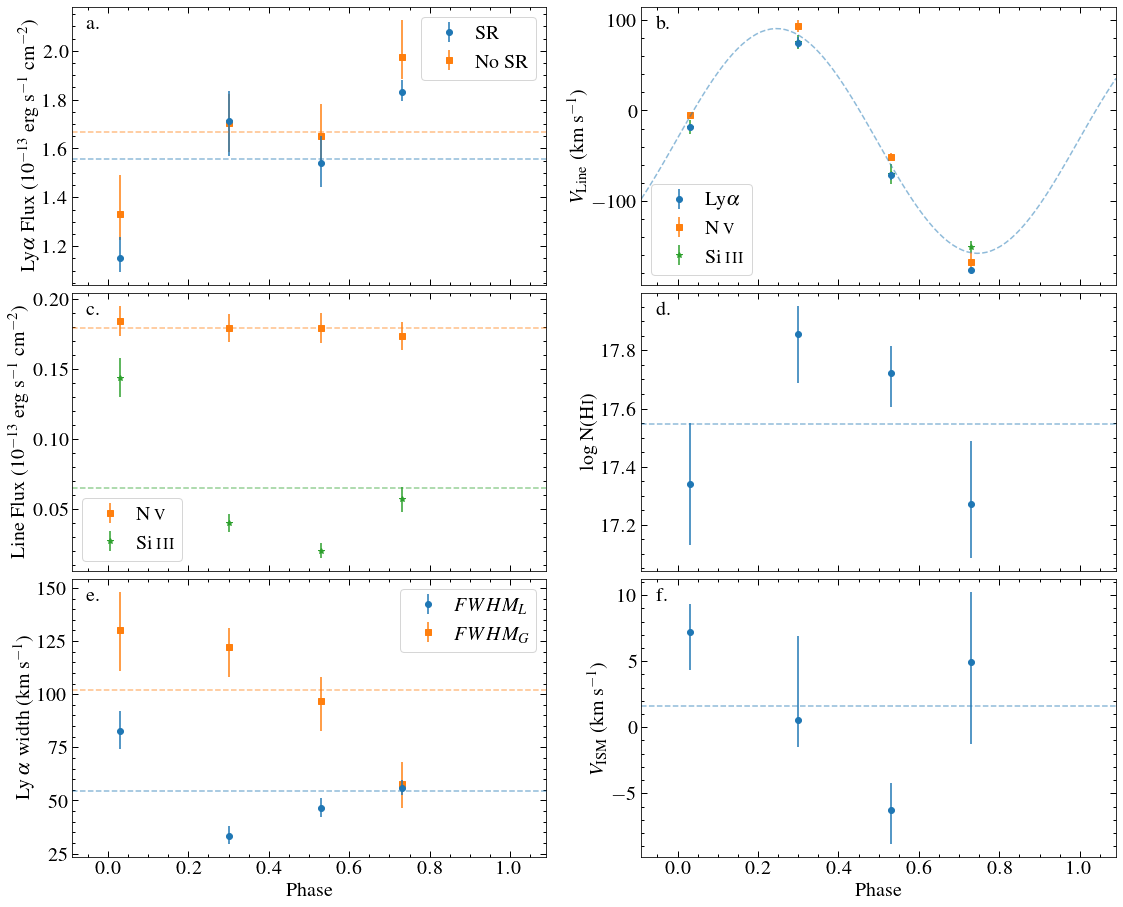

In [229]:
#cleaner version
lya = 1215.67
fig, axes = plt.subplots(3, 2, figsize=(16,13), sharex=True)
# gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
xlims = [-0.09, 1.09]



# flya = np.array([])
# flya_err = np.array([])
# plt.subplot(611)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     flyai = data['lya_intrinsic_fluxes'][2]
#     flya_erri = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])
#     flya.append(flyai*fscale)
#     flya = np.append(flya, flyai)
#     flya_err = np.append(flya_erri*fscale)
# plt.errorbar(phase_sort, flya, yerr=flya_err, c='C3', marker='o', ls='none', label = 'SR_test')
  


#lya flux
plt.subplot(321)
plt.annotate('a.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)
f_sr = []
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    flya = data['lya_intrinsic_fluxes'][2]
    flya_err = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])*fscale
    flya *= fscale
    f_sr.append(flya)
    if i == 0:
        plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C0', marker = 'o', label = 'SR', ls='none')
    else:
        plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C0', marker = 'o', ls='none')

f_nosr = []
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    flya = data['lya_intrinsic_fluxes'][2]
    flya_err = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])*fscale 
    flya *= fscale
    f_nosr.append(flya)
    if i == 0:
        plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C1', marker = 's', alpha =1 , zorder=-1, label='No SR', ls='none')
    else:
        plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C1', marker = 's', alpha =1 , zorder=-1, ls='none')
    
plt.axhline(np.mean(f_sr), ls='--', c='C0', alpha=0.5)
plt.axhline(np.mean(f_nosr), ls='--', c='C1', alpha=0.5)
        
plt.legend(frameon=True)
# plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
# plt.ylabel(r'Ly\,$\alpha$ Intrinsic Flux$^*$')
plt.ylabel(r'Ly$\alpha$ Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$)')
# plt.annotate(r'$^*$(10$^{-13}$ erg s$^{-1}$ cm$^{-2}$)', (0.98, 0.02), xycoords='axes fraction', ha='right', va='bottom') 
plt.xticks(visible=False)
plt.xlim(xlims[0], xlims[1])

#lyafwhm
fwl = []
fwg = []
plt.subplot(325)
plt.annotate('e.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    fwhml = data['fw_L_n value'][2]
    fwhml_err = np.array([[fwhml-data['fw_L_n value'][1]],[data['fw_L_n value'][3]-fwhml]])
    if i == 0:
        plt.errorbar(phase_sort[i], fwhml, yerr=fwhml_err, marker='o', c='C0', label = r'$FWHM_L$', ls='none')
    else:
        plt.errorbar(phase_sort[i], fwhml, yerr=fwhml_err, marker='o', c='C0', ls='none')
    fwl.append(fwhml)
    
    fwhmg = data['fw_G_n value'][2]
    fwhmg_err = np.array([[fwhmg-data['fw_G_n value'][1]],[data['fw_G_n value'][3]-fwhmg]])
    if i == 0:
        plt.errorbar(phase_sort[i], fwhmg, yerr=fwhmg_err, marker='s', c='C1', label = r'$FWHM_G$', zorder=-1, alpha=1, ls='none')
    else:
        plt.errorbar(phase_sort[i], fwhmg, yerr=fwhmg_err, marker='s', c='C1', zorder=-1, alpha=1, ls='none')
    fwg.append(fwhmg)
plt.axhline(np.mean(fwl), ls='--', c='C0', alpha=0.5)
plt.axhline(np.mean(fwg), ls='--', c='C1', alpha=0.5)  
    
plt.legend(frameon=True)
plt.ylabel(r'Ly\,$\alpha$ width  (km s$^{-1}$)')
# plt.xticks(visible=False)   
plt.xlim(xlims[0], xlims[1])
plt.xlabel('Phase')

#N(H)
nhs = []
plt.subplot(324)
plt.annotate('d.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    nh = data['h1_col value'][2]
    nh_err = np.array([[nh-data['h1_col value'][1]],[data['h1_col value'][3]-nh]])
    plt.errorbar(phase_sort[i], nh, yerr=nh_err, marker='o', c='C0', ls='none')
    nhs.append(nh)
plt.ylabel('log N(H{\sc i})')
plt.xticks(visible=False) 
plt.xlim(xlims[0], xlims[1])
plt.axhline(np.mean(nhs), ls='--', c='C0', alpha=0.5)

#v(ISM)
ismvs = []
plt.subplot(326)
plt.annotate('f.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    vism = data['h1_vel value'][2]
    vism_err = np.array([[vism-data['h1_vel value'][1]],[data['h1_vel value'][3]-vism]])
    plt.errorbar(phase_sort[i], vism, yerr=vism_err, marker='o', c='C0', ls='none')
    ismvs.append(vism)
plt.ylabel(r'$V_{\mathrm{ISM}}$ (km s$^{-1}$)')
# plt.xticks(visible=False) 
plt.xlim(xlims[0], xlims[1])
plt.axhline(np.mean(ismvs), ls='--', c='C0', alpha=0.5)

plt.xlabel('Phase')
#v(lines)
plt.subplot(322)
plt.annotate('b.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

vlyas= [] 
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    vlya = data['vs_n value'][2]
    vlya_err = np.array([[vlya-data['vs_n value'][1]],[data['vs_n value'][3]-vlya]])
    if i == 0:
        plt.errorbar(phase_sort[i], vlya, yerr=vlya_err, marker='o', c='C0', label= r'Ly$\alpha$', ls='none')
    else:
        plt.errorbar(phase_sort[i], vlya, yerr=vlya_err, marker='o', c='C0', ls='none')
    vlyas.append(vlya)




data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
vnvs = []
#oehua4010_SR_nosmearing_MCMC_results.csv
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][5]
    name = 'vs{} value'.format(speci)
    vNv = data[name][2]
    vNv_err = np.array([[vNv-data[name][1]],[data[name][3]-vNv]])
    if i == 0:
        plt.errorbar(phase_sort[i], vNv, yerr=vNv_err, marker='s', c='C1', label= r'N\,{\sc v}', ls='none', zorder=-1, alpha=1)
    else:
        plt.errorbar(phase_sort[i], vNv, yerr=vNv_err, marker='s', c='C1', ls='none', zorder=-1, alpha=1)
    vnvs.append(vNv)
        
        
data = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))
vsis =[]
#oehua4010_SR_nosmearing_MCMC_results.csv
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][5]
    name = 'vs{} value'.format(speci)
    vsi = data[name][2]
    vsi_err = np.array([[vsi-data[name][1]],[data[name][3]-vsi]])
    if i == 0:
        plt.errorbar(phase_sort[i], vsi, yerr=vsi_err, marker='*', c='C2', label= r'Si\,{\sc iii}', ls='none', zorder=-2, alpha=1)
    else:
        plt.errorbar(phase_sort[i], vsi, yerr=vsi_err, marker='*', c='C2', ls='none', zorder=-2, alpha=1)
    vsis.append(vsi)


fitter = fitting.LevMarLSQFitter()

allvs = np.array([vlyas, vnvs, vsis])
allvs = np.mean(allvs, axis=0)
print(allvs)
# #add a sine curve for reference

gamma = -29.0*u.km/u.s
gamma_e = 4.8*u.km/u.s
k2 = 124.9*u.km/u.s
# k2 = 126.0*u.km/u.s # (2.5)
k2_e = 0.4*u.km/u.s
k2_range = [k2-k2_e,k2+k2_e]
gamma_range = [gamma-gamma_e, gamma+gamma_e]

orbit = models.Sine1D(k2.value, 1, phase=0.5, bounds=dict(amplitude=k2_range), fixed=dict(frequency=True))+models.Const1D(gamma.value, bounds=dict(amplitude=gamma_range))
orbfit = fitter(orbit, phase_sort, allvs, maxiter=10000)
plt.plot(np.linspace(xlims[0], xlims[1], 100), orbfit(np.linspace(xlims[0], xlims[1], 100)), alpha=0.5, ls='--')
print(orbfit)

        
plt.legend(frameon=True)
plt.ylabel(r'$V_{\mathrm{Line}}$ (km s$^{-1}$)')
plt.xticks(visible=False) 
plt.xlim(xlims[0], xlims[1])

#line_fluxes
plt.subplot(323)
plt.annotate('c.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
#oehua4010_SR_nosmearing_MCMC_results.csv
#oehua1010_model_tmp_fluxes
fnvs =[]
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][:9]
    # print(speci)
    name = '{}_model_tmp_fluxes'.format(speci)
    fNv = data[name][2]
    fNv_err = np.array([[fNv-data[name][1]],[data[name][3]-fNv]])
    fNv, fNv_err = fNv*fscale, fNv_err*fscale
    if i == 0:
        plt.errorbar(phase_sort[i], fNv, yerr=fNv_err, marker='s', c='C1', label= r'N\,{\sc v}', ls='none', zorder=-1, alpha=1)
    else:
        plt.errorbar(phase_sort[i], fNv, yerr=fNv_err, marker='s', c='C1', ls='none', zorder=-1, alpha=1)
    fnvs.append(fNv)
        
        
data = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))
#oehua4010_SR_nosmearing_MCMC_results.csv
fsis = []
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][:9]
    name = '{}_model_tmp_fluxes'.format(speci)
    fsi = data[name][2]
    fsi_err = np.array([[fsi-data[name][1]],[data[name][3]-fsi]])
    fsi, fsi_err = fsi*fscale, fsi_err*fscale
    if i == 0:
        plt.errorbar(phase_sort[i], fsi, yerr=fsi_err, marker='*', c='C2', label= r'Si\,{\sc iii}', ls='none', zorder=-2, alpha=1)
    else:
        plt.errorbar(phase_sort[i], fsi, yerr=fsi_err, marker='*', c='C2', ls='none', zorder=-2, alpha=1)
    fsis.append(fsi)
    
plt.axhline(np.mean(fnvs), ls='--', alpha =0.5, c='C1')
plt.axhline(np.mean(fsis), ls='--', alpha =0.5, c='C2')

plt.legend(frameon=True)
plt.ylabel('Line Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$)')
plt.xticks(visible=False) 

plt.xlim(xlims[0], xlims[1])
# plt.xlabel('Phase')

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
# plt.xlabel('Phase', size=20)


plt.tight_layout()
plt.subplots_adjust(hspace=0.03)

plt.savefig('plots/lya_results_sum.pdf')



In [71]:
data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))

In [72]:
data

col0,oehua1010_model_low_2sig,oehua1010_model_low_1sig,oehua1010_model_median,oehua1010_model_high_1sig,oehua1010_model_high_2sig,oehua1010_model_tmp_low_2sig,oehua1010_model_tmp_low_1sig,oehua1010_model_tmp_median,oehua1010_model_tmp_high_1sig,oehua1010_model_tmp_high_2sig,oehua2010_model_low_2sig,oehua2010_model_low_1sig,oehua2010_model_median,oehua2010_model_high_1sig,oehua2010_model_high_2sig,oehua2010_model_tmp_low_2sig,oehua2010_model_tmp_low_1sig,oehua2010_model_tmp_median,oehua2010_model_tmp_high_1sig,oehua2010_model_tmp_high_2sig,oehua3010_model_low_2sig,oehua3010_model_low_1sig,oehua3010_model_median,oehua3010_model_high_1sig,oehua3010_model_high_2sig,oehua3010_model_tmp_low_2sig,oehua3010_model_tmp_low_1sig,oehua3010_model_tmp_median,oehua3010_model_tmp_high_1sig,oehua3010_model_tmp_high_2sig,oehua4010_model_low_2sig,oehua4010_model_low_1sig,oehua4010_model_median,oehua4010_model_high_1sig,oehua4010_model_high_2sig,oehua4010_model_tmp_low_2sig,oehua4010_model_tmp_low_1sig,oehua4010_model_tmp_median,oehua4010_model_tmp_high_1sig,oehua4010_model_tmp_high_2sig,oehua1010_model_tmp_fluxes,oehua2010_model_tmp_fluxes,oehua3010_model_tmp_fluxes,oehua4010_model_tmp_fluxes,vs1 value,vs2 value,vs3 value,vs4 value,am1 value,fw_G1 value,am2 value,fw_G2 value,am3 value,fw_G3 value,am4 value,fw_G4 value,c1 value,c2 value,c3 value,c4 value,wave_oehua1010,flux_oehua1010,error_oehua1010,wave_oehua2010,flux_oehua2010,error_oehua2010,wave_oehua3010,flux_oehua3010,error_oehua3010,wave_oehua4010,flux_oehua4010,error_oehua4010
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1.3813479033003612e-15,1.4814866850423965e-15,1.586316422804227e-15,1.6910807803617155e-15,1.790323857543226e-15,1.3813479033003612e-15,1.4814866850423965e-15,1.586316422804227e-15,1.6910807803617155e-15,1.790323857543226e-15,1.0345985268381784e-15,1.145096303043802e-15,1.2534339871172873e-15,1.362618736146477e-15,1.466476252735916e-15,1.0345985268381784e-15,1.145096303043802e-15,1.2534339871172873e-15,1.362618736146477e-15,1.466476252735916e-15,1.3512999223680499e-15,1.4514270255692556e-15,1.5557957243816265e-15,1.6640623889665603e-15,1.7634305092975502e-15,1.3512999223680499e-15,1.4514270255692556e-15,1.5557957243816265e-15,1.6640623889665603e-15,1.7634305092975502e-15,1.3650636839109723e-15,1.4720494283071872e-15,1.581056140162316e-15,1.6912355549056306e-15,1.795181371101396e-15,1.3650636839109723e-15,1.4720494283071872e-15,1.581056140162316e-15,1.6912355549056306e-15,1.795181371101396e-15,1.5393370298774988e-14,1.632638792076285e-14,1.5977270434009883e-14,1.5860043860522806e-14,-190.35294770402854,-10.11070899206096,79.61508301402844,-60.84133223286594,-14.801041648490093,30.799345630442023,-13.90273005755515,40.432446209123896,-14.474360053899826,37.9509293640578,-14.403219193188239,14.748875214441753,1.3808758448020596e-15,1.0380289101570666e-15,1.3515637140626888e-15,1.3655445403504734e-15,1235.0049029291838,-1.503153138526954e-16,1.3348191045455546e-15,1235.0511051721276,1.829532403158573e-16,1.4051663554853267e-15,1235.003177729415,1.147461028206179e-15,1.328652598810425e-15,1235.0485428974885,1.715019901436896e-15,1.408302283214299e-15
1,1.3813479033003612e-15,1.4814866850423965e-15,1.586316422804227e-15,1.6910807803617155e-15,1.790323857543226e-15,1.3813479033003612e-15,1.4814866850423965e-15,1.586316422804227e-15,1.6910807803617155e-15,1.790323857543226e-15,1.0345985268381784e-15,1.145096303043802e-15,1.2534339871172873e-15,1.36261

In [182]:

# flya = np.array([])
# flya_err = np.array([[],[]])
# flya_err = []
# flya_err = np.ndarray(shape=(len(sr_specs_phase), 2, 1))
# # print(flya_err)
# # plt.subplot(611)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     flyai = data['lya_intrinsic_fluxes'][2]

#     flya_erri = [[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]]
#     flya_err[[i][0][0]] = flya - data['lya_intrinsic_fluxes'][1]
#     flya_err[[1], [i]] = [data['lya_intrinsic_fluxes'][3]-flya]
    
#     # flya = np.append(flyai*fscale)
#     flya = np.append(flya, flyai)
#     # flya_err = np.append(flya_err, flya_erri*fscale, axis=1)
#     # flya_err[i] = flya_erri*fscale
#     flya_err.append(flya_erri)
# # print(flya_err[1:])
# flya_err = np.array(flya_err[1:])
# print(flya_err)
# plt.errorbar(phase_sort, flya, yerr=flya_err, c='C3', marker='o', ls='none', label = 'SR_test')
  


TypeError: 'int' object is not subscriptable